<a href="https://colab.research.google.com/github/The-Bambi/CV/blob/master/engineering_thesis_revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
#Ścieżka do pliku

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/data.csv', sep = ' ')

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,EventID,TotCharge,EnDep,NPixels,NPads,NTimeS,X,Y,Z,MaxADC,NumTracksAssigned
count,13627668.000,13627668.000,13627668.000,13627668.000,13627668.000,13627668.000,13627668.000,13627668.000,13627668.000,13627668.000,13627668.000
mean,26468.184,786.998,0.000,24.031,4.693,4.936,-4.729,-1.036,258.454,73.459,0.417
std,104.227,14123.013,0.000,268.228,8.919,13.141,156.144,26.084,380.388,67.873,0.493
min,26289.000,5.773,0.000,2.000,1.000,2.000,-380.520,-64.322,-495.403,2.887,0.000
25%,26377.000,79.205,0.000,4.000,2.000,2.000,-74.906,-18.904,-49.023,20.233,0.000
50%,26468.000,222.194,0.000,8.000,3.000,3.000,11.882,-0.349,426.385,54.595,0.000
75%,26561.000,377.357,0.000,12.000,4.000,4.000,66.235,16.912,576.281,96.667,1.000
max,26646.000,2160410.000,0.000,16232.000,192.000,250.000,380.571,50.647,728.435,450.185,1.000


In [5]:
data = data.drop(columns=['EnDep'])

In [6]:
round(data['NumTracksAssigned'].loc[data['NumTracksAssigned']==1].count()/data.shape[0], 3)

0.417

41% of the data is 1, 59% is 0.

In [7]:
data.drop(columns=['EventID']).corr()

,TotCharge,NPixels,NPads,NTimeS,X,Y,Z,MaxADC,NumTracksAssigned
TotCharge,1.000,0.443,0.134,0.421,-0.002,-0.004,0.001,0.089,-0.027
NPixels,0.443,1.000,0.237,0.775,-0.007,-0.002,0.016,0.054,-0.046
NPads,0.134,0.237,1.000,0.202,-0.016,0.114,-0.067,0.084,-0.096
NTimeS,0.421,0.775,0.202,1.000,-0.019,-0.029,0.026,0.124,-0.105
X,-0.002,-0.007,-0.016,-0.019,1.000,0.008,-0.047,0.026,0.056
Y,-0.004,-0.002,0.114,-0.029,0.008,1.000,0.053,0.046,0.029
Z,0.001,0.016,-0.067,0.026,-0.047,0.053,1.000,-0.089,-0.117
MaxADC,0.089,0.054,0.084,0.124,0.026,0.046,-0.089,1.000,0.184
NumTracksAssigned,-0.027,-0.046,-0.096,-0.105,0.056,0.029,-0.117,0.184,1.000


In [8]:
X, y = data[['TotCharge', 'NPixels', 'NPads', 'NTimeS', 'X', 'Y', 'Z', 'MaxADC']], data['NumTracksAssigned']

In [9]:
from sklearn.feature_selection import mutual_info_classif

In [10]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [11]:
# make_mi_scores(X, y)
# dont run this coz it takes 20 minutes. Results below.

In [12]:
long_to_calculate_data = {
  'NPads':0.384,
  'NTimeS':0.338,
  'MaxADC':0.300,
  'NPixels':0.252,
  'TotCharge':0.214,
  'Z':0.173,
  'X':0.125,
  'Y':0.071
}

In [13]:
X.describe()

,TotCharge,NPixels,NPads,NTimeS,X,Y,Z,MaxADC
count,13627668.000,13627668.000,13627668.000,13627668.000,13627668.000,13627668.000,13627668.000,13627668.000
mean,786.998,24.031,4.693,4.936,-4.729,-1.036,258.454,73.459
std,14123.013,268.228,8.919,13.141,156.144,26.084,380.388,67.873
min,5.773,2.000,1.000,2.000,-380.520,-64.322,-495.403,2.887
25%,79.205,4.000,2.000,2.000,-74.906,-18.904,-49.023,20.233
50%,222.194,8.000,3.000,3.000,11.882,-0.349,426.385,54.595
75%,377.357,12.000,4.000,4.000,66.235,16.912,576.281,96.667
max,2160410.000,16232.000,192.000,250.000,380.571,50.647,728.435,450.185


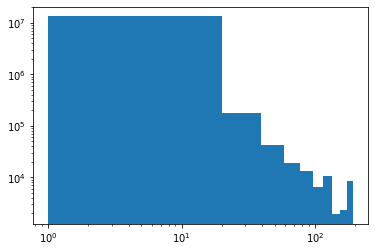

In [17]:
plt.hist(X['NPads'])
plt.xscale('log')
plt.yscale('log')

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

In [20]:
preprocessor = ColumnTransformer(
    transformers=[("norm", Normalizer(), X.drop(columns=['NPads','NTimeS']).columns)]
)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_valid1, X_valid2, y_valid1, y_valid2 = train_test_split(X_valid, y_valid, test_size=0.5)

In [25]:
from xgboost import XGBRegressor, XGBClassifier

In [26]:
X_train = preprocessor.fit_transform(X_train)

In [27]:
X_valid1 = preprocessor.transform(X_valid1)
X_valid2 = preprocessor.transform(X_valid2)

In [28]:
my_model = XGBClassifier(n_estimators=20)

In [29]:
my_model.fit(X_train, y_train,
             eval_set=[(X_valid1, y_valid1), (X_valid2, y_valid2)],
            early_stopping_rounds=3,
)

[09:19:04] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-error:0.193684	validation_1-error:0.192861
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 3 rounds.
[1]	validation_0-error:0.191138	validation_1-error:0.190234
[2]	validation_0-error:0.19337	validation_1-error:0.192537
[3]	validation_0-error:0.191074	validation_1-error:0.190167
[4]	validation_0-error:0.191527	validation_1-error:0.190558
[5]	validation_0-error:0.189975	validation_1-error:0.189098
[6]	validation_0-error:0.190856	validation_1-error:0.189932
[7]	validation_0-error:0.187924	validation_1-error:0.187054
[8]	validation_0-error:0.186011	validation_1-error:0.185082
[9]	validation_0-error:0.185002	validation_1-error:0.184131
[10]	validation_0-error:0.1

XGBClassifier(n_estimators=20)

In [30]:
from sklearn.metrics import confusion_matrix

In [32]:
predicts = my_model.predict(X_valid1)

In [33]:
predicts

array([1, 0, 1, ..., 1, 0, 1])

In [35]:
matrix = confusion_matrix(y_valid1, predicts)

In [36]:
matrix

array([[637295, 155896],
       [ 60174, 509402]])

In [38]:
matrix/len(X_valid1)

array([[0.46764781, 0.11439667],
       [0.04415575, 0.37379978]])

In [39]:
old_matrix = np.array([[18189, 2148], [1926, 18173]])

In [43]:
old_matrix/40436

array([[0.44982194, 0.05312098],
       [0.04763082, 0.44942625]])

interestingly enough, XGBoost performs slightly better on true positives, worse on true negatives. Wonder if fiddling with meta parameters can boost this a in any way.

In [44]:
my_model2 = XGBClassifier(n_estimators=20, )

In [ ]:
my_model2.fit(X_train, y_train,
             eval_set=[(X_valid1, y_valid1), (X_valid2, y_valid2)],
             early_stopping_rounds=3,
)